# Atmospheric Attenuation
Atmospheric attenuation of sound is the decrease in sound intensity as it travels through the Earth's atmosphere. Various factors contribute to this attenuation, such as absorption and scattering. Sound absorption occurs when sound energy is converted into heat energy as it interacts with atmospheric molecules. This process is frequency-dependent, as it can be seen below, with higher frequencies experiencing greater attenuation. The calculations in this section is based on {cite:t}`bugaru_recent_2021` and {cite:t}`iso_9613_1`.

In [1]:
import os
from pathlib import Path
import sys
sys.path.append(str(Path(os.getcwd()).parent.parent))
from src.utils import atmospheric_absorption, print_code
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML

ModuleNotFoundError: No module named 'src.utils'

## Sound attenuation coefficient
To calculate atmospheric attenuation, it is necessary to determine the sound attenuation coefficient, $\alpha$. This coefficient quantifies the amount of sound absorbed by the air per meter traveled from the sound source. The sound attenuation coefficient is determined by considering factors such as frequency, temperature, relative humidity, and ambient atmospheric pressure. By incorporating these variables into the calculation, the attenuation of sound in the atmosphere can be accurately estimated. The power level of the noise decreases in a linear manner with distance, and it can be calculated using the formula $A_{atm} = \alpha \cdot d$.

In [2]:
HTML(print_code(atmospheric_absorption))

### Frequency influence
Lets visualize the atmospheric absorption for different relative humidities and frequencies.

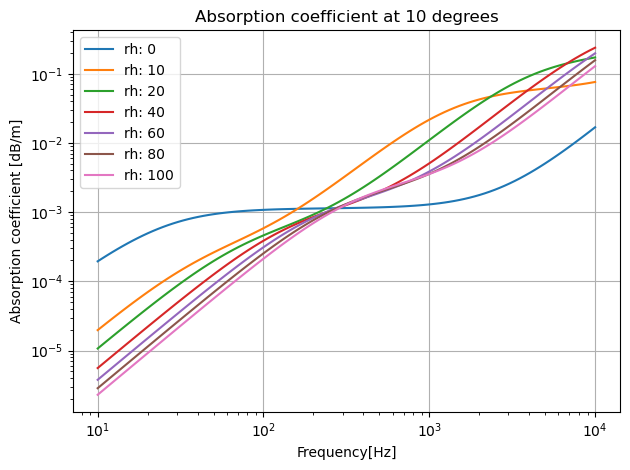

In [3]:
t = 10 # temperature
fs = np.logspace(1, 4, num=100, endpoint=True, base=10) # frequency range
alphas = np.zeros(fs.shape) # initiate alpha
rhs = (0, 10, 20, 40, 60, 80, 100) # relative humidity range

plt.figure()
for rh in rhs:
    for i, f in enumerate(fs):
        alphas[i] = atmospheric_absorption(f, t, rh)
    plt.loglog(fs, alphas, label='rh: %d'%rh)
plt.title(f'Absorption coefficient at {t} degrees')
plt.grid(True)
plt.xlabel('Frequency[Hz]')
plt.ylabel('Absorption coefficient [dB/m]')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

As shown in the graph above, the frequency of the noise significantly influences the level of atmospheric absorption. Higher frequencies experience greater absorption, resulting in reduced sound levels. Generally, with a few exceptions, higher relative humidity contributes to lower levels of absorption.

### Relative humidity influence

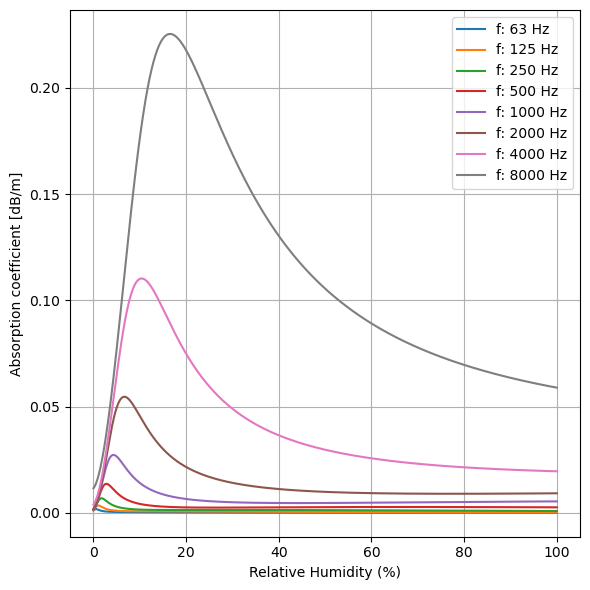

In [4]:
rh_list = np.linspace(0, 100, 1000)
f_list = [63, 125, 250, 500, 1000, 2000, 4000, 8000]

fig, ax = plt.subplots(figsize = (6,6))
for f in f_list:
    Aatm = atmospheric_absorption(f, 20, rh_list)
    ax.plot(rh_list, Aatm, label = f"f: {f} Hz")
ax.legend()
ax.set(xlabel = "Relative Humidity (%)",
       ylabel = 'Absorption coefficient [dB/m]')
ax.grid()
plt.tight_layout()
plt.show()

As observed above, relative humidity also exerts a significant influence on atmospheric absorption. Particularly in the range of 10-30% relative humidity, there appears to be a notable increase in absorption.

### Temperature influence

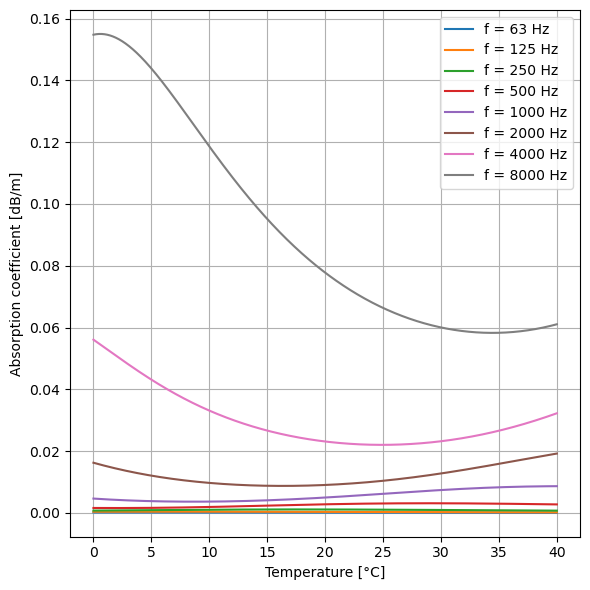

In [5]:
t_list = np.linspace(0, 40, 1000)
f_list = [63, 125, 250, 500, 1000, 2000, 4000, 8000]

fig, ax = plt.subplots(figsize = (6,6))
for f in f_list:
    Aatm = atmospheric_absorption(f, t_list, rh=70)
    ax.plot(t_list, Aatm, label = f"f = {f} Hz")
ax.legend()
ax.set(xlabel = "Temperature [°C]",
       ylabel = 'Absorption coefficient [dB/m]')
ax.grid()
plt.tight_layout()
plt.show()

As seen from the above graph, temperature has a relatively minor impact on the overall level of absorption. In general, higher absorption rates are observed at lower temperatures.